<a href="https://colab.research.google.com/github/JuliustheCreator/channel-growth-model/blob/main/analysis/youtube_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Modules**

In [9]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# **Cleaning Data**


---


We clean the data using Pandas. A specific outlier is removed, which is a Youtube channel with an inaccurate date of 1970. We reformat the table to our appropriate format. The dataset is exported using Pickle to be used in our regression neural network.

In [2]:
#Reading in Data
url = 'https://raw.githubusercontent.com/JuliustheCreator/channel-growth-model/main/data/topSubscribed.csv'
df = pd.read_csv(url)

#Removing outliers 
df = df.dropna().replace("https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels", "Misc")
df = df.dropna().replace(1970, "2005")

#Removing the commas in each string
for col in ["Subscribers", "Video Views", "Video Count"]:
  df[col] = df[col].str.replace(",", "")

#Casting video count to int and dividing by 1000
for col in ["Video Count"]: 
  df[col] = df[col].astype(int)
  df[col] = df[col] / 1000

#Casting each element to integer then dividing by a million when needed
for col in ["Subscribers", "Video Views"]: 
  df[col] = df[col].astype(int)
  df[col] = df[col] / 1000000

#Casting each element to integer
for col in ["Rank","Started"]: 
  df[col] = df[col].astype(int)

#Creating Age Column
df['Age'] = 2023 - df['Started']

#Exporting Cleaned Data to use in Regression Model
with open("cleaned_data.pkl", "wb") as f:
    pickle.dump(df, f)

files.download("cleaned_data.pkl")

# Displaying Dataset
print(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

     Rank             Youtube Channel  Subscribers    Video Views  \
0       1                    T-Series        234.0  212900.271553   
1       2              YouTube Movies        161.0       0.000000   
2       3  Cocomelon - Nursery Rhymes        152.0  149084.178448   
3       4                   SET India        150.0  137828.094104   
4       5                     MrBeast        128.0   21549.128785   
..    ...                         ...          ...            ...   
995   996                     XO TEAM         11.5   11471.384709   
996   997         Nirahua Music World         11.5    5997.717755   
997   998                     YtCrash         11.4       3.825084   
998   999                   Painzeiro         11.4    2143.444281   
999  1000                   Oum Walid         11.4    2480.064722   

     Video Count          Category  Started  Age  
0         18.515             Music     2006   17  
1          0.000  Film & Animation     2015    8  
2          0.846  

# **Displaying Advanced Statistics**


---


We display the mean, median, variance, and standard deviation, for the channels' subscribers, video views, video count, and age (as of 2022)

In [3]:
#Number of Subscribers
print(f'The average amount of subscribers is {(round(1_000_000 * df["Subscribers"].mean(), 2)):,}')
print(f'The median amount of subscribers is {round(1_000_000 * df["Subscribers"].median(), 2):,}')
print(f'The variance of subscribers is {round(1_000_000 * df["Subscribers"].var(), 2):,}')
print(f'The standard deviation of subscribers is {round(df["Subscribers"].std(), 2):,} \n')


#Video Views
print(f'The average amount of video views is {round(1_000_000 * df["Video Views"].mean(), 2):,}')
print(f'The median amount of video views is {round(1_000_000 * df["Video Views"].median(), 2):,}')
print(f'The variance of video views is {round(df["Video Views"].var(), 2):,}')
print(f'The standard deviation of video views is {round(df["Video Views"].std(), 2):,} \n')

#Video Count
print(f'The average video count is {round(1000 * df["Video Count"].mean(), 2):,}')
print(f'The median video count is {round(1000 * df["Video Count"].median(), 2):,}')
print(f'The variance video count is {round(1000 * df["Video Count"].var(), 2):,}')
print(f'The standard deviation of the video count is {round(df["Video Count"].std(), 2):,} \n')

#Age
print("The average age is: ", round(df["Age"].mean(), 2))
print("The median age is: ", round(df["Age"].median(), 2))
print("The variance of the ages is: ", round(df["Age"].var(), 2))
print("The standard deviation of the ages is: ", round(df["Age"].std(), 2), "\n")


The average amount of subscribers is 21,581,400.0
The median amount of subscribers is 16,600,000.0
The variance of subscribers is 276,409,363.4
The standard deviation of subscribers is 16.63 

The average amount of video views is 9,994,912,409.73
The median amount of video views is 6,723,360,159.0
The variance of video views is 169,141,923.65
The standard deviation of video views is 13,005.46 

The average video count is 9,416.23
The median video count is 896.0
The variance video count is 1,036,254.63
The standard deviation of the video count is 32.19 

The average age is:  10.37
The median age is:  10.0
The variance of the ages is:  15.13
The standard deviation of the ages is:  3.89 



# **Visualization**



---


### **Aggregate Video Views per Category**


---
We visualize the aggregate video views for each category through matplotlib, creating a bar chart.


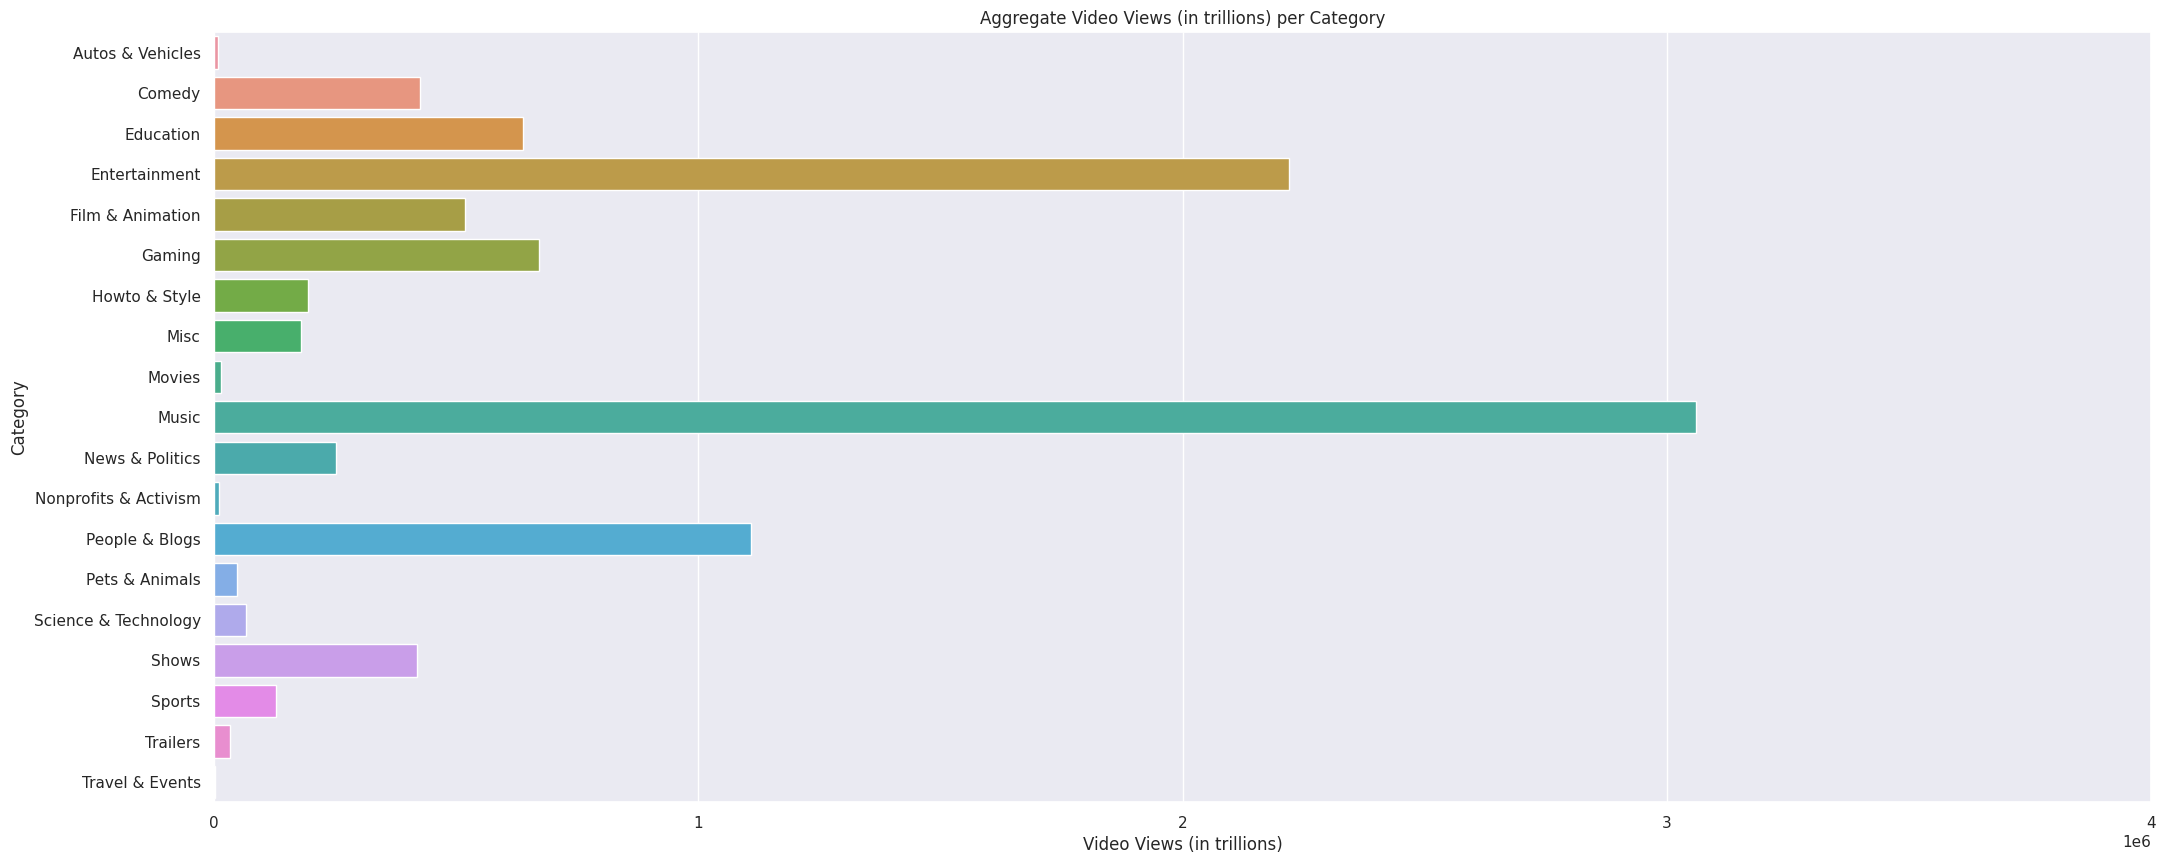

In [4]:
# Grouping and aggregating
groupedByCat = df.groupby(["Category"], as_index=False)["Video Views"].sum()

# Plotting
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x = groupedByCat['Video Views'], y = groupedByCat['Category'], orient = 'h');

# Formatting
plt.xticks(range(0, 5000000, 1000000))
plt.xlabel("Video Views (in trillions)")
plt.ylabel("Category")
plt.title("Aggregate Video Views (in trillions) per Category")

plt.show()



---


### Aggregate Video Views for Age of Channel


---



Text(0, 0.5, 'Views (in millions)')

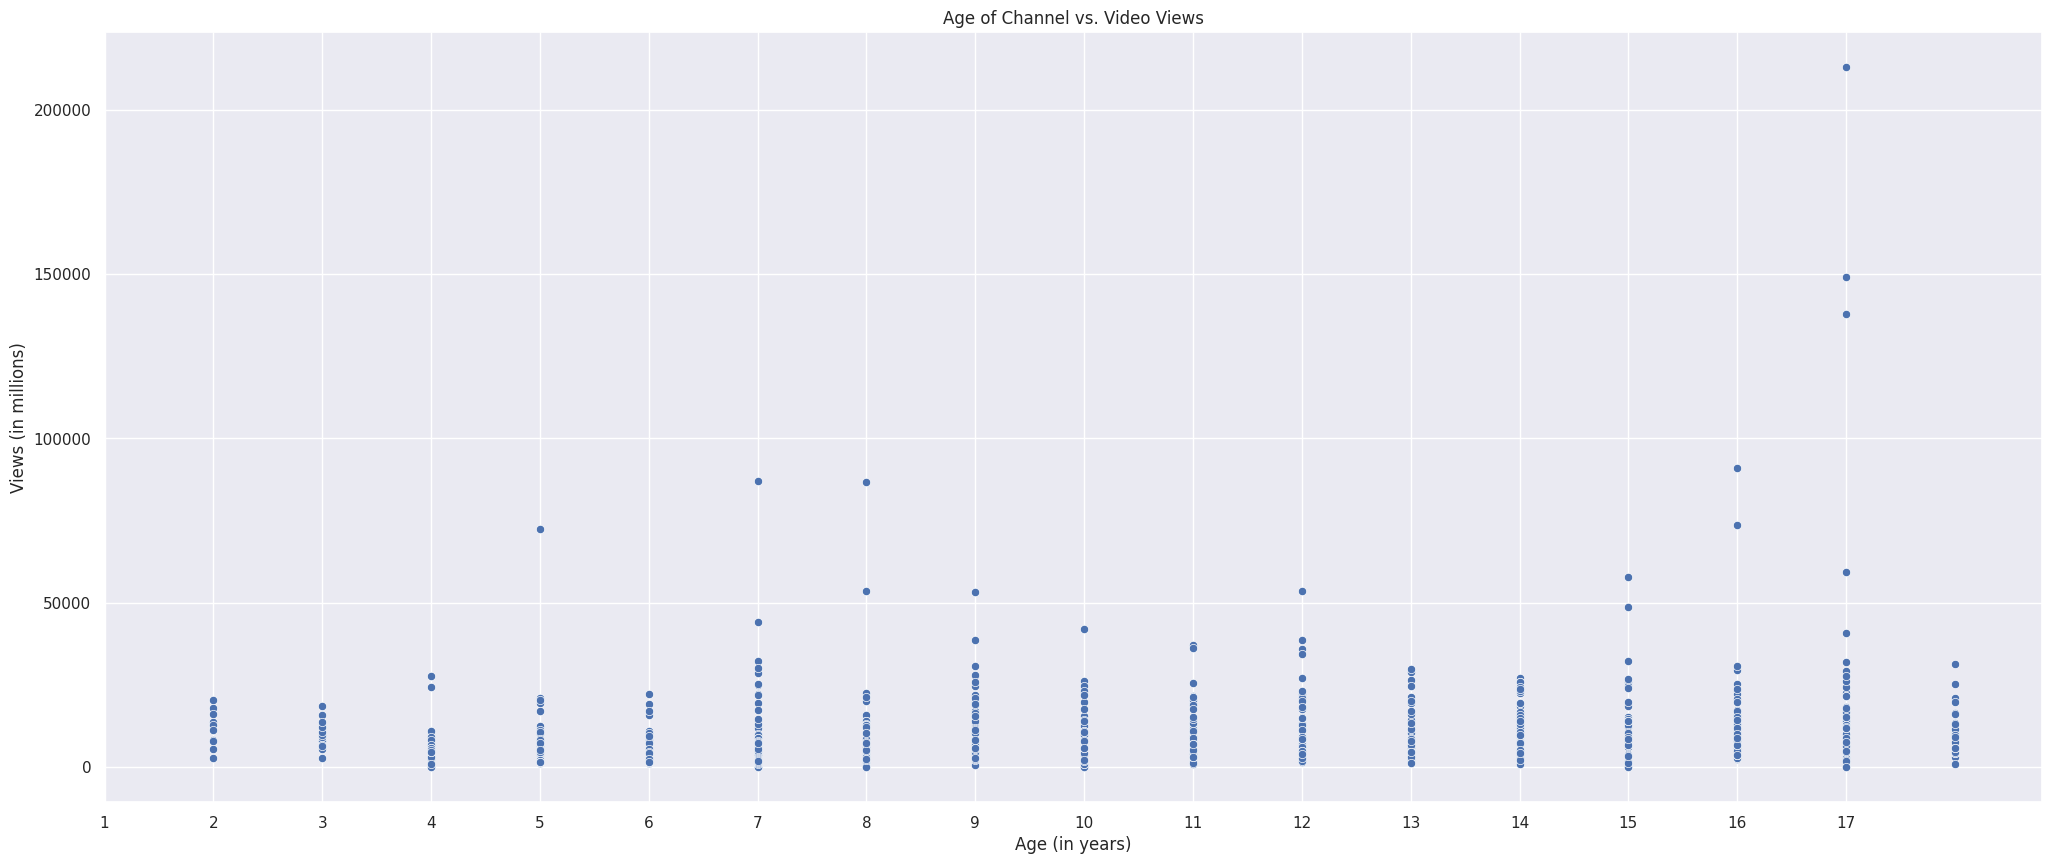

In [5]:
#Scatter plot Graphing
sns.set(rc={'figure.figsize':(25,10)})
sns.scatterplot(x = df['Age'], y = df['Video Views']);

#plt.scatter(df["Age"], df["Video Views"])
plt.title("Age of Channel vs. Video Views")

plt.xticks(range(1,18))
plt.xlabel("Age (in years)")
plt.ylabel("Views (in millions)")




---


### Aggregate Video Views for Each Channel

---



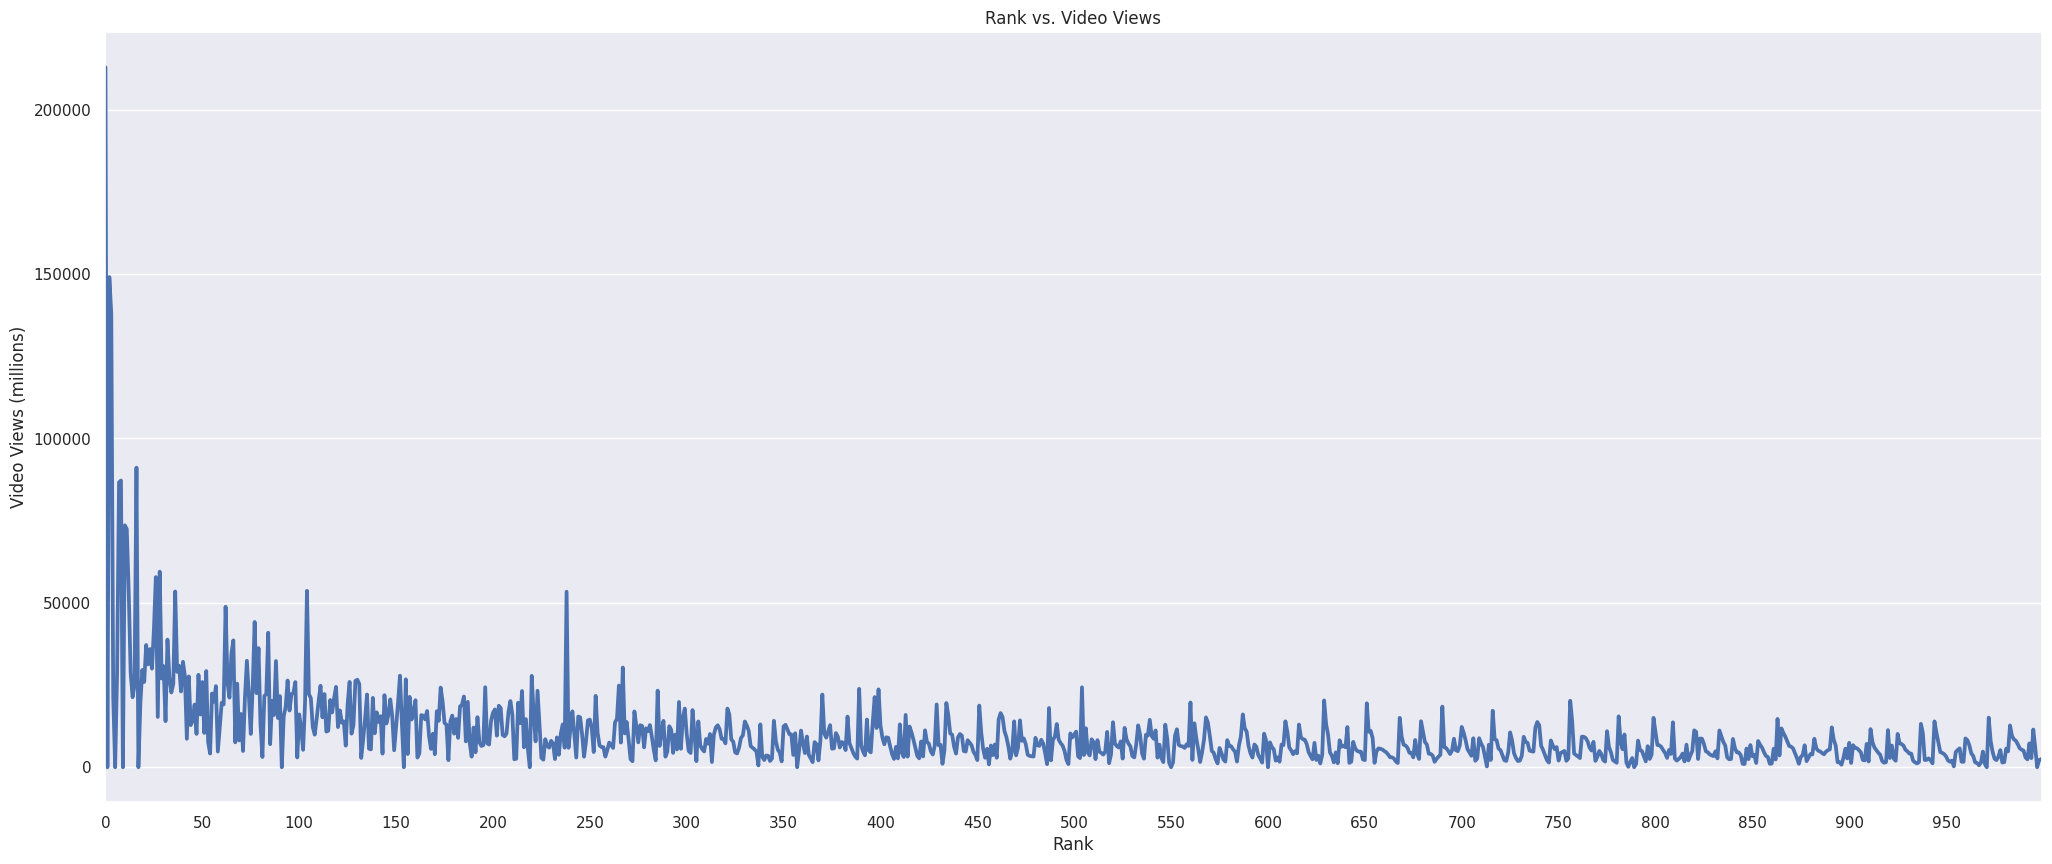

In [10]:
sns.set(rc={'figure.figsize':(25,10)})
sns.pointplot(x = df["Rank"], y = df["Video Views"], markers = '');

plt.title("Rank vs. Video Views")
plt.xlabel("Rank")
plt.ylabel("Video Views (millions)")

plt.xticks(range(0, df["Rank"].max(), 50), range(0, df["Rank"].max(), 50));



---

### Top 1000 Youtube Channel Creation for Each Year


---



Text(0.5, 1.0, 'Year of Channel Creation vs. Numbers of Channels Created')

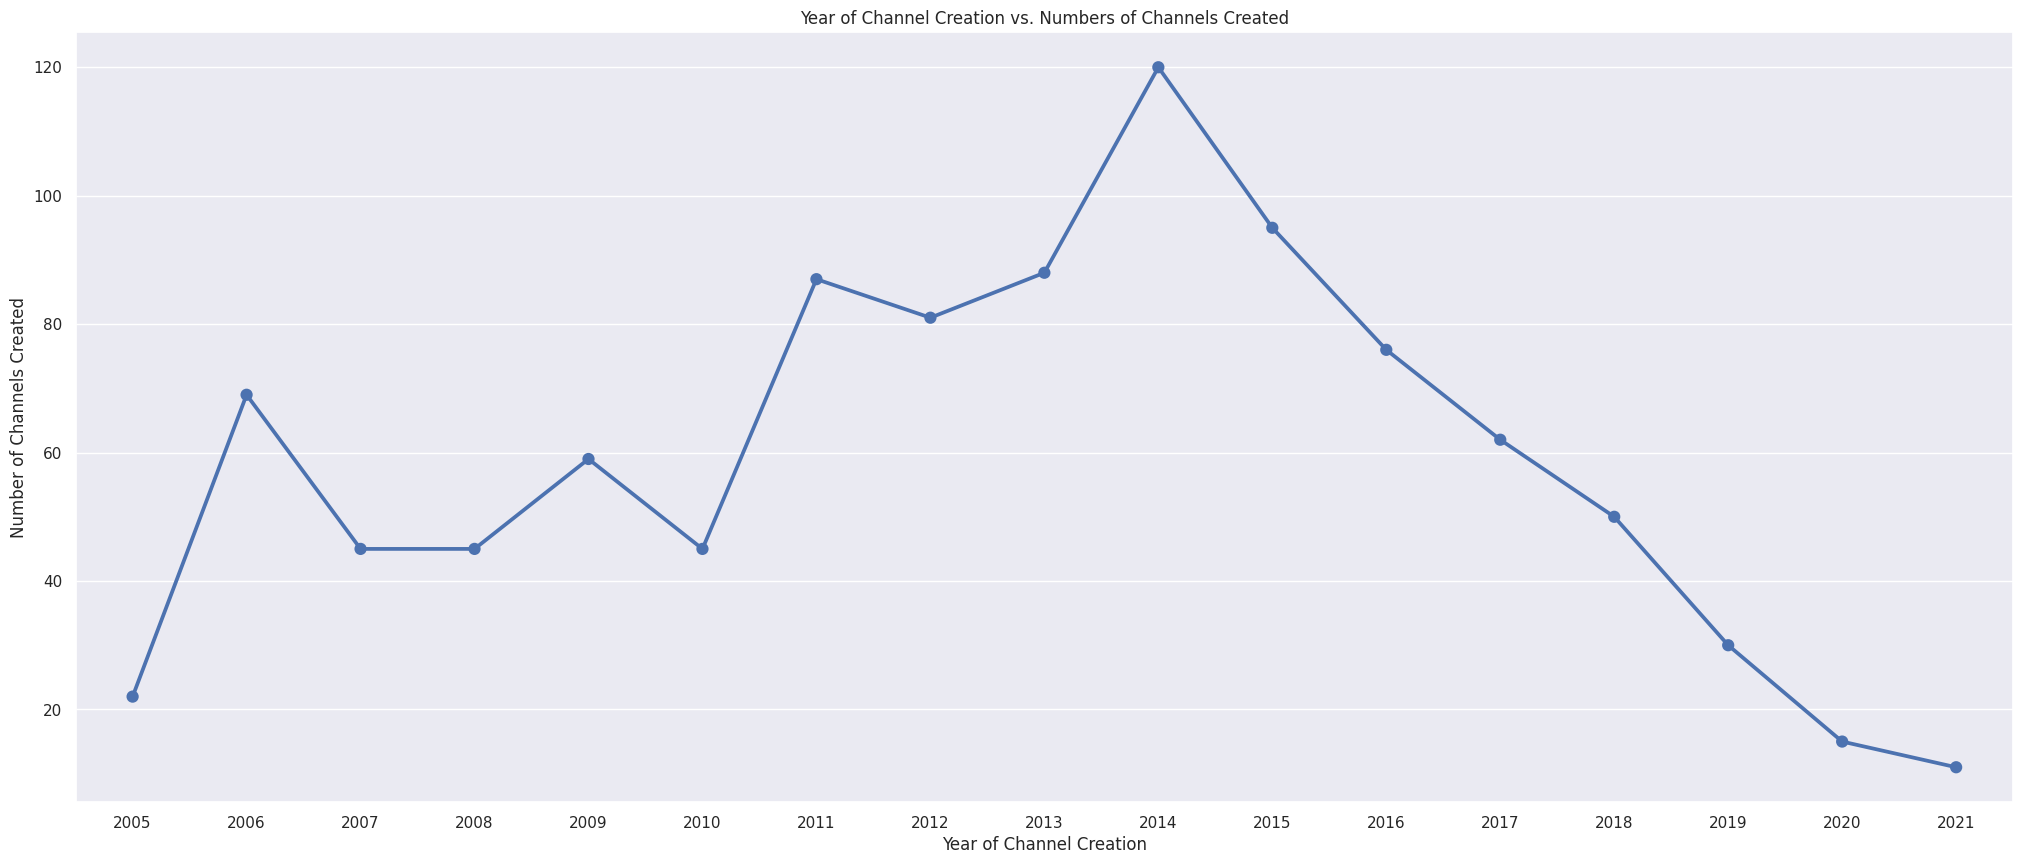

In [7]:
yearStarted = df['Started'].value_counts()

sns.set(rc={'figure.figsize':(25,10)})
sns.pointplot(x = yearStarted.index, y = yearStarted.values)

plt.xlabel("Year of Channel Creation")
plt.ylabel("Number of Channels Created")
plt.title("Year of Channel Creation vs. Numbers of Channels Created")